alfie pymongo use

In [1]:
import os
from dotenv import load_dotenv
from pathlib import Path
from pymongo import MongoClient




In [2]:
#jonathan's stuff
import matplotlib.pyplot as plt
import pandas as pd
import ast
import datetime
import seaborn as sns
import json
import numpy as np

import matplotlib as mpl

from datetime import datetime
from dateutil.parser import parse

In [3]:
from pandas.io.json import json_normalize

In [4]:
pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
%matplotlib inline

In [5]:
from astropy.stats import RipleysKEstimator

In [6]:
# load .env variable
base_dir = 'C:/Users/Alfie/Documents/MSc Smart Cities/Term 2/Spatial Data Capture Storage and Analysis/Coursework/Analysis Test/'
dotenv_file = os.path.join(base_dir, '.env')

In [7]:
if os.path.isfile(dotenv_file):
    load_dotenv(dotenv_file, verbose=True)

In [8]:
db_uri = os.getenv('DB_URI')

In [9]:
db_client = MongoClient(str(db_uri))

C:\Users\Alfie\Anaconda3\lib\site-packages\pymongo\common.py:555: UserWarning: Unknown option retryWrites
  warnings.warn(str(exc))


In [10]:
# choose a database to connect to (.london)
db_london = db_client.london
status = db_client.london.command('serverStatus')

In [11]:
db_london_events = db_london['events']
db_london_artist = db_london['artists']

In [12]:
allLondonEvents = db_london_events.find()

In [13]:
allLondonEvents

In [14]:
londonEventsdf = pd.DataFrame(list(allLondonEvents))

In [15]:
londonEventsdf

,_id,artists,date,datetime,datetime_source,foursquare,id,lastfm,location,name,popularity,spotify,time,type,url,venue
0,5af9c6dc0cc9ab0004e227d1,[{'mbid': ['aca5718f-4f49-4439-b8f6-209db3f117...,2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '4ac518e9f964a520daab20e3', 'name': 'Ro...",31245569,"{'listeners': [412072, 57, 192843], 'listeners...","{'lng': -0.1491962, 'lat': 51.5429551}",Frank Turner with Seán McGowan and Get Cape. W...,0.0503,"{'genres': [], 'popularity': [64, 25, 32], 'po...",19:00:00,Concert,http://www.songkick.com/concerts/31245569-fran...,"{'id': 17874, 'name': 'Roundhouse', 'location'..."
1,5af9c6de0cc9ab0004e227d3,"[{'mbid': [], 'id': 8437833, 'name': 'Andy May...",2018-05-14,NaT,None,"{'id': '4ac518c5f964a520afa420e3', 'name': 'Th...",31640764,"{'listeners': [18], 'listeners_sum': 18, 'play...","{'lng': -0.1011681, 'lat': 51.5233496}","Andy May Trio at The Slaughtered Lamb (May 14,...",0.0000,"{'genres': [], 'popularity': [3], 'popularity_...",None,Concert,http://www.songkick.com/concerts/31640764-andy...,"{'id': 6950, 'name': 'The Slaughtered Lamb', '..."
2,5af9c6e30cc9ab0004e227d6,[{'mbid': ['6655955b-1c1e-4bcb-84e4-81bcd9efab...,2018-05-14,2018-05-14 17:45:00,2018-05-14T18:45:00+0100,"{'id': '4ac518e8f964a52075ab20e3', 'name': 'Ro...",31785344,"{'listeners': [721424, 19477], 'listeners_sum'...","{'lng': -0.1781517, 'lat': 51.500786}",Ólafur Arnalds with Manu Delago at Royal Alber...,0.0329,"{'genres': ['bow pop', 'chamber pop', 'composi...",18:45:00,Concert,http://www.songkick.com/concerts/31785344-olaf...,"{'id': 17538, 'name': 'Royal Albert Hall', 'lo..."
3,5af9c6e50cc9ab0004e227d8,[{'mbid': ['d100e4ac-31f1-4af1-b0e1-f07c545abb...,2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '53713174498e54bcdede7275', 'name': 'Up...",32044684,"{'listeners': [313], 'listeners_sum': 313, 'pl...","{'lng': -0.1038429, 'lat': 51.5466983}",Elephant Sessions at Thousand Island (formerly...,0.0001,"{'genres': ['scottish folk'], 'popularity': [3...",19:00:00,Concert,http://www.songkick.com/concerts/32044684-elep...,"{'id': 434301, 'name': 'Thousand Island (forme..."
4,5af9c6eb0cc9ab0004e227db,[{'mbid': ['366323f3-0409-4a30-a3e9-ce1e25d277...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,"{'id': '4b5e0cfdf964a520037b29e3', 'name': 'Bu...",32192284,"{'listeners': [7057, 3625], 'listeners_sum': 1...","{'lng': -0.2314873, 'lat': 51.5062847}","Gary Lucas and Ed Laurie at Bush Hall (May 14,...",0.0004,"{'genres': [], 'popularity': [25, 1], 'popular...",19:30:00,Concert,http://www.songkick.com/concerts/32192284-gary...,"{'id': 17541, 'name': 'Bush Hall', 'location':..."
5,5af9c6ed0cc9ab0004e227dd,[{'mbid': ['a1ef6bc8-2644-4b6d-aa21-27b630acf7...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,{},32454499,"{'listeners': [113695], 'listeners_sum': 11369...","{'lng': -0.5541293, 'lat': 51.2486437}","Nils Lofgren at G Live (May 14, 2018)",0.0052,"{'genres': ['pub rock', 'roots rock'], 'popula...",19:30:00,Concert,http://www.songkick.com/concerts/32454499-nils...,"{'id': 1262471, 'name': 'G Live', 'location': ..."
6,5af9c6ef0cc9ab0004e227df,[{'mbid': ['c1982570-8efb-4cf7-bb5b-c9c026c0e8...,2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '59bbad4dfebf314eba5d9fbb', 'name': 'Br...",32492684,"{'listeners': [120157], 'listeners_sum': 12015...","{'lng': -0.0774607, 'lat': 51.5033289}",Ladysmith Black Mambazo at Bridge Theatre (May...,0.0115,"{'genres': ['afropop', 'world'], 'popularity':...",19:00:00,Concert,http://www.songkick.com/concerts/32492684-lady...,"{'id': 3565864, 'name': 'Bridge Theatre', 'loc..."
7,5af9c6f00cc9ab0004e227e1,"[{'mbid': [], 'id': 6651674, 'name': 'Gemma Kh...",2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '53aa2db3498e191dfd67bd05', 'name': 'Fo...",32649974,"{'listeners': [32], 'listeners_sum': 32, 'play...","{'lng': -0.1355174, 'lat': 51.5403054}",Gemma Khawaja at Folk in the Cellar: The Const...,0.0000,NaN,19:00:00,Concert,http:

In [16]:
londonEventsdf['spotify'][50]['genres']

['aussietronica', 'deep australian indie', 'indie r&b', 'vapor soul']

In [24]:
#now to do all the processing that jonathan sorted out

# Put this in the date format
londonEventsdf['date'] = [(datetime.strptime(londonEventsdf['date'][x], '%Y-%m-%d')) for x in range(len(londonEventsdf['date']))]

# Convert the dates into day name
londonEventsdf['date_name'] = [(londonEventsdf['date'][x].strftime("%A")) for x in range(len(londonEventsdf['date']))]

# Lat & Long
londonEventsdf['lat'] = [(londonEventsdf['location'][x]['lat']) for x in range(len(londonEventsdf['location']))]
londonEventsdf['lng'] = [(londonEventsdf['location'][x]['lng']) for x in range(len(londonEventsdf['location']))]

In [120]:
#get min and max date of this dataset
print(min(londonEventsdf['date']))
print(max((londonEventsdf['date'])))

2018-04-13 00:00:00
2018-05-26 00:00:00


In [116]:
#need to translate from wgs to bng to do spatial clustering
import pyproj

In [136]:
# Define some common projections using EPSG codes
wgs84=pyproj.Proj("+init=EPSG:4326") # LatLon with WGS84 datum used by GPS units and Google Earth
osgb36=pyproj.Proj("+init=EPSG:27700") # UK Ordnance Survey, 1936 datum



In [142]:
#make new columns for the new latlng
londonEventsdfNoNan['BNGnorthing'] = ""
londonEventsdfNoNan['BNGeasting'] = ""

In [143]:
#now run through the dataset and transform those coordinates
for i in londonEventsdfNoNan['index']:
    print(i)
    origLat = londonEventsdfNoNan['lat'][i]
    origLng = londonEventsdfNoNan['lng'][i]
    lat,lon = pyproj.transform(wgs84,osgb36,origLat,origLng)
    londonEventsdfNoNan['BNGnorthing'][i] = lat
    londonEventsdfNoNan['BNGeasting'][i] = lon

0


C:\Users\Alfie\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Alfie\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyError: 1760

In [95]:
#create a new pd without NaNs
londonEventsdfNoNan = londonEventsdf[londonEventsdf['lat'].notnull()]

,level_0,index,_id,artists,date,datetime,datetime_source,foursquare,id,lastfm,...,time,type,url,venue,date_name,lat,lng,dbscanLabels1,BNGnorthing,BNGeasting


In [96]:
londonEventsdfNoNan = londonEventsdfNoNan.reset_index()

In [25]:
#now to try out the clustering with this new data set
#now import DBSCAN clustering package
from sklearn.cluster import DBSCAN

In [147]:
#select only reggae gigs
londonEventsdfNoNan.columns

Index(['level_0', 'index', '_id', 'artists', 'date', 'datetime',
       'datetime_source', 'foursquare', 'id', 'lastfm', 'location', 'name',
       'popularity', 'spotify', 'time', 'type', 'url', 'venue', 'date_name',
       'lat', 'lng', 'dbscanLabels1', 'BNGnorthing', 'BNGeasting'],
      dtype='object')

In [148]:
#reggae from spotify
reggaeEventsdf = londonEventsdfNoNan[londonEventsdfNoNan['spotify'].astype(str).str.contains('reggae', case=False)]

In [149]:
#reggae from lastfm
reggaeEventsdf2 = londonEventsdfNoNan[londonEventsdfNoNan['lastfm'].astype(str).str.contains('reggae', case=False)]

In [150]:
allReggaeEvents = pd.concat([reggaeEventsdf,reggaeEventsdf2])

In [151]:
allReggaeEvents

,level_0,index,_id,artists,date,datetime,datetime_source,foursquare,id,lastfm,...,time,type,url,venue,date_name,lat,lng,dbscanLabels1,BNGnorthing,BNGeasting
472,472,472,5afabe06dcab560004a0b2d5,[{'mbid': ['d121b55b-bb5d-4e9c-89d3-3045d75c73...,2018-05-20,2018-05-20 13:00:00,2018-05-20T14:00:00+0100,"{'id': '4ac518c6f964a52019a520e3', 'name': 'Ja...",33546774,"{'listeners': [4939, 7819, 73845], 'listeners_...",...,14:00:00,Concert,http://www.songkick.com/concerts/33546774-jack...,"{'id': 3372, 'name': 'Brixton Jamm', 'location...",Sunday,51.4710,-0.1120,14,"7,458,637.9012","-5,548,726.7916"
721,721,721,5afaee14f4259d0004b0e5bf,[{'mbid': ['ea3b97e8-8a76-4ea7-8e6f-3ebf40acae...,2018-04-14,2018-04-14 18:00:00,2018-04-14T19:00:00+0100,NaN,33016154,"{'listeners': [114363], 'listeners_sum': 11436...",...,19:00:00,Concert,http://www.songkick.com/concerts/33016154-mad-...,"{'id': 3337834, 'name': 'Archspace', 'location...",Saturday,51.5367,-0.0758,0,"7,470,767.1677","-5,542,047.0592"
1082,1082,1082,5afaf23cf4259d0004b0e956,[{'mbid': ['b7d92248-97e3-4450-8057-6fe06738f7...,2018-04-21,NaT,None,NaN,33330699,"{'listeners': [483591, 1747583, 1889998, 94300...",...,None,Festival,http://www.songkick.com/festivals/2299814-quee...,"{'id': 17538, 'name': 'Royal Albert Hall', 'lo...",Saturday,51.5008,-0.1782,1,"7,464,094.0449","-5,561,022.8424"
1290,1290,1290,5afaf4d5f4259d0004b0eb64,[{'mbid': ['b72cdb8b-81dd-444a-ab9a-b3487d001e...,2018-05-08,2018-05-08 18:00:00,2018-05-08T19:00:00+0100,NaN,33523264,"{'listeners': [7123, 52], 'listeners_sum': 717...",...,19:00:00,Concert,http://www.songkick.com/concerts/33523264-las-...,"{'id': 2845858, 'name': 'Our Black Heart', 'lo...",Tuesday,51.5388,-0.1418,0,"7,471,128.4953","-5,554,295.6606"
1493,1493,1493,5afcd54a4054df00043ae55a,[{'mbid': ['35e53195-f6e1-40bc-a3ae-62b1900ee1...,2018-05-24,2018-05-24 18:00:00,2018-05-24T19:00:00+0100,"{'id': '4ac518e8f964a520b3ab20e3', 'name': 'O2...",32793699,"{'listeners': [78988], 'listeners_sum': 78988,...",...,19:00:00,Concert,http://www.songkick.com/concerts/32793699-gent...,"{'id': 38320, 'name': 'O2 Shepherd's Bush Empi...",Thursday,51.5035,-0.2238,2,"7,464,556.3060","-5,569,501.7299"
1574,1574,1574,5aff77ee84d273000431fe19,[{'mbid': ['d7492185-0238-46b9-b5e9-3173920445...,2018-05-25,2018-05-25 11:00:00,2018-05-25T12:00:00+0100,"{'id': '5002e054e4b042c51cf1c8bb', 'name': 'Vi...",31697529,"{'listeners': [1895, 1159204, 2860129, 1980084...",...,12:00:00,Festival,http://www.songkick.com/festivals/2072544-all-...,"{'id': 3745, 'name': 'Victoria Park', 'locatio...",Friday,51.5353,-0.0425,-1,"7,470,518.4218","-5,535,869.7449"
14,14,14,5af9c7040cc9ab0004e227f2,[{'mbid': ['e3c24e1c-1e43-403b-8407-90c8c41070...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,"{'id': '4b75c0dcf964a52020222ee3', 'name': 'Th...",33042619,"{'listeners': [162766, 9376, 15377], 'listener...",...,19:30:00,Concert,http://www.songkick.com/concerts/33042619-now-...,"{'id': 29349, 'name': 'The Dome, Tufnell Park'...",Monday,51.5576,-0.1388,0,"7,474,597.0288","-5,553,750.6861"
82,82,82,5af9c7ca0cc9ab0004e22896,[{'mbid': ['51f447ee-e5ba-4cc1-b27c-42ea5a6103...,2018-05-15,2018-05-15 18:30:00,2018-05-15T19:30:00+0100,"{'id': '4b5e0cfdf964a520037b29e3', 'name': 'Bu...",33450909,"{'listeners': [39247, 36646], 'listeners_sum':...",...,19:30:00,Concert,http://www.songkick.com/concerts/33450909-jack...,"{'id': 17541, 'name': 'Bush Hall', 'location':...",Tuesday,51.5063,-0.2315,2,"7,465,060.8927","-5,570,923.1732"
270,270,270,5afabb18dcab560004a0b08f,[{'mbid': ['83bde443-318c-4d4e-8f31-1ca159df14...,2018-05-18,2018-05-18 17:30:00,2018-05-18T18:30:00+0100,"{'id': '53713174498e54bcdede7275', 'name': 'Up...",32751419,"{'listeners': [3113], 'listeners_sum': 3113, '...",...,18:30:00,Concert,http://www.songkick.com/concerts/32751419-unde...,"{'id': 434301, 'name': 'Thousand Island (forme...",Friday,51.5467,-0.1038,0,"7,472,605.8569","-5,547,257.8495"
428,428,428,5afabd8ddcab560004a0b271,"[{'mbid': [], 'id': 

In [152]:
#get rid of duplicates

allReggaeEvents = allReggaeEvents.drop_duplicates(subset='_id', keep='last')

In [153]:
allReggaeEvents

,level_0,index,_id,artists,date,datetime,datetime_source,foursquare,id,lastfm,...,time,type,url,venue,date_name,lat,lng,dbscanLabels1,BNGnorthing,BNGeasting
14,14,14,5af9c7040cc9ab0004e227f2,[{'mbid': ['e3c24e1c-1e43-403b-8407-90c8c41070...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,"{'id': '4b75c0dcf964a52020222ee3', 'name': 'Th...",33042619,"{'listeners': [162766, 9376, 15377], 'listener...",...,19:30:00,Concert,http://www.songkick.com/concerts/33042619-now-...,"{'id': 29349, 'name': 'The Dome, Tufnell Park'...",Monday,51.5576,-0.1388,0,"7,474,597.0288","-5,553,750.6861"
82,82,82,5af9c7ca0cc9ab0004e22896,[{'mbid': ['51f447ee-e5ba-4cc1-b27c-42ea5a6103...,2018-05-15,2018-05-15 18:30:00,2018-05-15T19:30:00+0100,"{'id': '4b5e0cfdf964a520037b29e3', 'name': 'Bu...",33450909,"{'listeners': [39247, 36646], 'listeners_sum':...",...,19:30:00,Concert,http://www.songkick.com/concerts/33450909-jack...,"{'id': 17541, 'name': 'Bush Hall', 'location':...",Tuesday,51.5063,-0.2315,2,"7,465,060.8927","-5,570,923.1732"
270,270,270,5afabb18dcab560004a0b08f,[{'mbid': ['83bde443-318c-4d4e-8f31-1ca159df14...,2018-05-18,2018-05-18 17:30:00,2018-05-18T18:30:00+0100,"{'id': '53713174498e54bcdede7275', 'name': 'Up...",32751419,"{'listeners': [3113], 'listeners_sum': 3113, '...",...,18:30:00,Concert,http://www.songkick.com/concerts/32751419-unde...,"{'id': 434301, 'name': 'Thousand Island (forme...",Friday,51.5467,-0.1038,0,"7,472,605.8569","-5,547,257.8495"
428,428,428,5afabd8ddcab560004a0b271,"[{'mbid': [], 'id': 20602, 'name': 'Fabio And ...",2018-05-19,2018-05-19 01:30:00,2018-05-19T02:30:00+0100,"{'id': '4c308a57ed37a5935bfb6803', 'name': 'Da...",33760344,"{'listeners': [3021, 23922, 46, 13227, 387, 10...",...,02:30:00,Concert,http://www.songkick.com/concerts/33760344-fabi...,"{'id': 1322316, 'name': 'Dalston Roof Park', '...",Saturday,51.5469,-0.0748,0,"7,472,656.2307","-5,541,859.3045"
456,456,456,5afabddbdcab560004a0b2b0,[{'mbid': ['a8b0dac5-9f4b-4b28-99fc-7e04980cc7...,2018-05-20,2018-05-20 18:00:00,2018-05-20T19:00:00+0100,"{'id': '4ac518c7f964a52072a520e3', 'name': 'Ja...",32754269,"{'listeners': [4234], 'listeners_sum': 4234, '...",...,19:00:00,Concert,http://www.songkick.com/concerts/32754269-ezhe...,"{'id': 7404, 'name': 'The Jazz Cafe', 'locatio...",Sunday,51.5387,-0.1431,0,"7,471,110.9528","-5,554,540.1298"
472,472,472,5afabe06dcab560004a0b2d5,[{'mbid': ['d121b55b-bb5d-4e9c-89d3-3045d75c73...,2018-05-20,2018-05-20 13:00:00,2018-05-20T14:00:00+0100,"{'id': '4ac518c6f964a52019a520e3', 'name': 'Ja...",33546774,"{'listeners': [4939, 7819, 73845], 'listeners_...",...,14:00:00,Concert,http://www.songkick.com/concerts/33546774-jack...,"{'id': 3372, 'name': 'Brixton Jamm', 'location...",Sunday,51.4710,-0.1120,14,"7,458,637.9012","-5,548,726.7916"
585,585,585,5afaec82f4259d0004b0e44f,"[{'mbid': [], 'id': 344650, 'name': 'Jazz Jama...",2018-04-13,2018-04-13 18:00:00,2018-04-13T19:00:00+0100,NaN,31514219,"{'listeners': [13060], 'listeners_sum': 13060,...",...,19:00:00,Concert,http://www.songkick.com/concerts/31514219-jazz...,"{'id': 7404, 'name': 'The Jazz Cafe', 'locatio...",Friday,51.5387,-0.1431,0,"7,471,110.9528","-5,554,540.1298"
629,629,629,5afaed23f4259d0004b0e4d7,[{'mbid': ['6d87044e-3b4c-4814-819a-5598d55b33...,2018-04-13,2018-04-13 22:00:00,2018-04-13T23:00:00+0100,NaN,32881704,"{'listeners': [112791, 72192, 1529, 7696, 3994...",...,23:00:00,Concert,http://www.songkick.com/concerts/32881704-redl...,"{'id': 8850, 'name': 'fabric', 'location': {'l...",Friday,51.5196,-0.1025,0,"7,467,599.7226","-5,546,992.0784"
680,680,680,5afaed97f4259d0004b0e551,[{'mbid': ['84957363-216a-49e3-80f4-4feefaacc7...,2018-04-14,2018-04-14 18:00:00,2018-04-14T19:00:00+0100,NaN,31594514,"{'listeners': [1389], 'listeners_sum': 1389, '...",...,19:00:00,Concert,http://www.songkick.com/concerts/31594514-addi...,"{'id': 7404, 'name': 'The Jazz Cafe', 'locatio...",Saturday,51.5387,-0.1431,0,"7,471,110.9528","-5,554,540.1298"
681,681,681,5afaed9ef4259d0004b0

In [160]:
londonEventsdfNoNan['BNGnorthing'].dtype
print (londonEventsdfNoNan.dtypes)

level_0                     int64
index                       int64
_id                        object
artists                    object
date               datetime64[ns]
datetime           datetime64[ns]
datetime_source            object
foursquare                 object
id                          int64
lastfm                     object
location                   object
name                       object
popularity                float64
spotify                    object
time                       object
type                       object
url                        object
venue                      object
date_name                  object
lat                       float64
lng                       float64
dbscanLabels1               int64
BNGnorthing                object
BNGeasting                 object
dtype: object


In [164]:
londonEventsdfNoNan['BNGnorthing'] = pd.to_numeric(londonEventsdfNoNan['BNGnorthing'])
londonEventsdfNoNan['BNGeasting'] = pd.to_numeric(londonEventsdfNoNan['BNGeasting'])

In [165]:
minLatLdn = min(londonEventsdfNoNan['BNGnorthing'])
minLngLdn = min(londonEventsdfNoNan['BNGeasting'])
maxLatLdn = max(londonEventsdfNoNan['BNGnorthing'])
maxLngLdn = max(londonEventsdfNoNan['BNGeasting'])

In [177]:
londonEventsdfNoNan = londonEventsdfNoNan[londonEventsdfNoNan['BNGnorthing'].notnull()]

In [178]:
londonEventsdfNoNan = londonEventsdfNoNan.reset_index()

ValueError: cannot insert level_0, already exists

In [176]:
londonEventsdfNoNan

,level_0,index,_id,artists,date,datetime,datetime_source,foursquare,id,lastfm,...,time,type,url,venue,date_name,lat,lng,dbscanLabels1,BNGnorthing,BNGeasting
0,0,0,5af9c6dc0cc9ab0004e227d1,[{'mbid': ['aca5718f-4f49-4439-b8f6-209db3f117...,2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '4ac518e9f964a520daab20e3', 'name': 'Ro...",31245569,"{'listeners': [412072, 57, 192843], 'listeners...",...,19:00:00,Concert,http://www.songkick.com/concerts/31245569-fran...,"{'id': 17874, 'name': 'Roundhouse', 'location'...",Monday,51.5430,-0.1492,0,"7,471,890.3385","-5,555,678.2760"
1,1,1,5af9c6de0cc9ab0004e227d3,"[{'mbid': [], 'id': 8437833, 'name': 'Andy May...",2018-05-14,NaT,None,"{'id': '4ac518c5f964a520afa420e3', 'name': 'Th...",31640764,"{'listeners': [18], 'listeners_sum': 18, 'play...",...,None,Concert,http://www.songkick.com/concerts/31640764-andy...,"{'id': 6950, 'name': 'The Slaughtered Lamb', '...",Monday,51.5233,-0.1012,0,"7,468,300.3744","-5,546,750.6695"
2,2,2,5af9c6e30cc9ab0004e227d6,[{'mbid': ['6655955b-1c1e-4bcb-84e4-81bcd9efab...,2018-05-14,2018-05-14 17:45:00,2018-05-14T18:45:00+0100,"{'id': '4ac518e8f964a52075ab20e3', 'name': 'Ro...",31785344,"{'listeners': [721424, 19477], 'listeners_sum'...",...,18:45:00,Concert,http://www.songkick.com/concerts/31785344-olaf...,"{'id': 17538, 'name': 'Royal Albert Hall', 'lo...",Monday,51.5008,-0.1782,1,"7,464,094.0449","-5,561,022.8424"
3,3,3,5af9c6e50cc9ab0004e227d8,[{'mbid': ['d100e4ac-31f1-4af1-b0e1-f07c545abb...,2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '53713174498e54bcdede7275', 'name': 'Up...",32044684,"{'listeners': [313], 'listeners_sum': 313, 'pl...",...,19:00:00,Concert,http://www.songkick.com/concerts/32044684-elep...,"{'id': 434301, 'name': 'Thousand Island (forme...",Monday,51.5467,-0.1038,0,"7,472,605.8569","-5,547,257.8495"
4,4,4,5af9c6eb0cc9ab0004e227db,[{'mbid': ['366323f3-0409-4a30-a3e9-ce1e25d277...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,"{'id': '4b5e0cfdf964a520037b29e3', 'name': 'Bu...",32192284,"{'listeners': [7057, 3625], 'listeners_sum': 1...",...,19:30:00,Concert,http://www.songkick.com/concerts/32192284-gary...,"{'id': 17541, 'name': 'Bush Hall', 'location':...",Monday,51.5063,-0.2315,2,"7,465,060.8927","-5,570,923.1732"
5,5,5,5af9c6ed0cc9ab0004e227dd,[{'mbid': ['a1ef6bc8-2644-4b6d-aa21-27b630acf7...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,{},32454499,"{'listeners': [113695], 'listeners_sum': 11369...",...,19:30:00,Concert,http://www.songkick.com/concerts/32454499-nils...,"{'id': 1262471, 'name': 'G Live', 'location': ...",Monday,51.2486,-0.5541,3,"7,417,168.1322","-5,630,182.8604"
6,6,6,5af9c6ef0cc9ab0004e227df,[{'mbid': ['c1982570-8efb-4cf7-bb5b-c9c026c0e8...,2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '59bbad4dfebf314eba5d9fbb', 'name': 'Br...",32492684,"{'listeners': [120157], 'listeners_sum': 12015...",...,19:00:00,Concert,http://www.songkick.com/concerts/32492684-lady...,"{'id': 3565864, 'name': 'Bridge Theatre', 'loc...",Monday,51.5033,-0.0775,0,"7,464,618.5515","-5,542,343.1906"
7,7,7,5af9c6f00cc9ab0004e227e1,"[{'mbid': [], 'id': 6651674, 'name': 'Gemma Kh...",2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '53aa2db3498e191dfd67bd05', 'name': 'Fo...",32649974,"{'listeners': [32], 'listeners_sum': 32, 'play...",...,19:00:00,Concert,http://www.songkick.com/concerts/32649974-gemm...,"{'id': 2683308, 'name': 'Folk in the Cellar: T...",Monday,51.5403,-0.1355,0,"7,471,409.9622","-5,553,136.5520"
8,8,8,5af9c6f40cc9ab0004e227e4,[{'mbid': ['8af55e27-c6ad-44f3-a6d2-53df546279...,2018-05-14,2018-05-14 19:00:00,2018-05-14T20:00:00+0100,"{'id': '4acdbaf0f964a520d6cc20e3', 'name': 'Ki...",32754149,"{'listeners': [24294, 2015], 'listeners_sum': ...",...,20:00:00,Concert,http://www.songkick.com/concerts/32754149-engl...,"{'id': 47963, 'name': 'Kings Place', 'location...",Monday,51.5346,-0.1221,0,"7,470,374.0700","-5,550,649.1128"
9,9,9,5af9c6f60cc9ab0004e227e6,

In [166]:
print(minLatLdn)
print(minLngLdn)
print(maxLatLdn)
print(maxLngLdn)

7355585.541905568
-5939396.991749904
7716219.141084558
-5429354.630457947


In [167]:
#now set up the ripley's k estimator object
Kest = RipleysKEstimator(area=2,x_max=maxLngLdn, y_max=maxLatLdn, x_min=minLngLdn, y_min=minLatLdn)

In [172]:
#need to put the lat and lng as an array
locsAsArray = londonEventsdfNoNan[['BNGnorthing', 'BNGeasting']].values

In [173]:
locsAsArray

array([[ 7471890.3384655 , -5555678.27598103],
       [ 7468300.37442145, -5546750.66952652],
       [ 7464094.0449011 , -5561022.84242024],
       ...,
       [ 7465420.01954819, -5551722.47937077],
       [ 7475450.81431476, -5541678.06779691],
       [ 7472168.93384741, -5547079.6736076 ]])

C:\Users\Alfie\Anaconda3\lib\site-packages\astropy\stats\spatial.py:238: RuntimeWarning: invalid value encountered in less
  ripley[r] = (distances < radii[r]).sum()
C:\Users\Alfie\Anaconda3\lib\site-packages\astropy\stats\spatial.py:249: RuntimeWarning: invalid value encountered in less
  dist_indicator = distances < radii[r]
C:\Users\Alfie\Anaconda3\lib\site-packages\astropy\stats\spatial.py:261: RuntimeWarning: invalid value encountered in greater
  u = np.sqrt((x * x - 1) * (x > 1))
C:\Users\Alfie\Anaconda3\lib\site-packages\astropy\stats\spatial.py:262: RuntimeWarning: invalid value encountered in less
  v = np.sqrt((x * x - b ** 2) * (x < math.sqrt(b ** 2 + 1)) * (x > b))
C:\Users\Alfie\Anaconda3\lib\site-packages\astropy\stats\spatial.py:262: RuntimeWarning: invalid value encountered in greater
  v = np.sqrt((x * x - b ** 2) * (x < math.sqrt(b ** 2 + 1)) * (x > b))
C:\Users\Alfie\Anaconda3\lib\site-packages\astropy\stats\spatial.py:264: RuntimeWarning: divide by zero encountered

KeyboardInterrupt: 

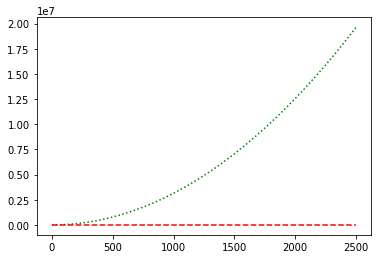

In [169]:
#now to plot and have a look
r = np.linspace(0, 2500, 50)
plt.plot(r, Kest.poisson(r), color='green', ls=':', label=r'$K_{pois}$')
plt.plot(r, Kest(data=locsAsArray, radii=r, mode='none'), color='red', ls='--',
         label=r'$K_{un}$')
plt.plot(r, Kest(data=locsAsArray, radii=r, mode='translation'), color='black',
         label=r'$K_{trans}$')
plt.plot(r, Kest(data=locsAsArray, radii=r, mode='ohser'), color='blue', ls='-.',
         label=r'$K_{ohser}$')
plt.plot(r, Kest(data=locsAsArray, radii=r, mode='var-width'), color='green',
         label=r'$K_{var-width}$')
plt.plot(r, Kest(data=locsAsArray, radii=r, mode='ripley'), color='yellow',
         label=r'$K_{ripley}$')

In [174]:
#try out a dbscan of all reggae
#create new dbscan cluster object
dbscan = DBSCAN(eps=500, min_samples=3)

In [175]:
#get only locations from the reggae set
#get just locations
#use the locsArray again

dbscan1stRun = dbscan.fit(locsAsArray)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [109]:
#get the labels of the groups
dbscan_labels = dbscan.labels_

In [110]:
dbscan_labels

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [111]:
#now add the labels back into the reggae dataframe
#need to reindex allReggaeEvents for it to work
londonEventsdfNoNan = londonEventsdfNoNan.reset_index()

ValueError: cannot insert level_0, already exists

In [112]:
londonEventsdfNoNan['dbscanLabels1'] = pd.DataFrame(dbscan_labels)

In [113]:
londonEventsdfNoNan

,level_0,index,_id,artists,date,datetime,datetime_source,foursquare,id,lastfm,...,popularity,spotify,time,type,url,venue,date_name,lat,lng,dbscanLabels1
0,0,0,5af9c6dc0cc9ab0004e227d1,[{'mbid': ['aca5718f-4f49-4439-b8f6-209db3f117...,2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '4ac518e9f964a520daab20e3', 'name': 'Ro...",31245569,"{'listeners': [412072, 57, 192843], 'listeners...",...,0.0503,"{'genres': [], 'popularity': [64, 25, 32], 'po...",19:00:00,Concert,http://www.songkick.com/concerts/31245569-fran...,"{'id': 17874, 'name': 'Roundhouse', 'location'...",Monday,51.5430,-0.1492,0
1,1,1,5af9c6de0cc9ab0004e227d3,"[{'mbid': [], 'id': 8437833, 'name': 'Andy May...",2018-05-14,NaT,None,"{'id': '4ac518c5f964a520afa420e3', 'name': 'Th...",31640764,"{'listeners': [18], 'listeners_sum': 18, 'play...",...,0.0000,"{'genres': [], 'popularity': [3], 'popularity_...",None,Concert,http://www.songkick.com/concerts/31640764-andy...,"{'id': 6950, 'name': 'The Slaughtered Lamb', '...",Monday,51.5233,-0.1012,0
2,2,2,5af9c6e30cc9ab0004e227d6,[{'mbid': ['6655955b-1c1e-4bcb-84e4-81bcd9efab...,2018-05-14,2018-05-14 17:45:00,2018-05-14T18:45:00+0100,"{'id': '4ac518e8f964a52075ab20e3', 'name': 'Ro...",31785344,"{'listeners': [721424, 19477], 'listeners_sum'...",...,0.0329,"{'genres': ['bow pop', 'chamber pop', 'composi...",18:45:00,Concert,http://www.songkick.com/concerts/31785344-olaf...,"{'id': 17538, 'name': 'Royal Albert Hall', 'lo...",Monday,51.5008,-0.1782,1
3,3,3,5af9c6e50cc9ab0004e227d8,[{'mbid': ['d100e4ac-31f1-4af1-b0e1-f07c545abb...,2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '53713174498e54bcdede7275', 'name': 'Up...",32044684,"{'listeners': [313], 'listeners_sum': 313, 'pl...",...,0.0001,"{'genres': ['scottish folk'], 'popularity': [3...",19:00:00,Concert,http://www.songkick.com/concerts/32044684-elep...,"{'id': 434301, 'name': 'Thousand Island (forme...",Monday,51.5467,-0.1038,0
4,4,4,5af9c6eb0cc9ab0004e227db,[{'mbid': ['366323f3-0409-4a30-a3e9-ce1e25d277...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,"{'id': '4b5e0cfdf964a520037b29e3', 'name': 'Bu...",32192284,"{'listeners': [7057, 3625], 'listeners_sum': 1...",...,0.0004,"{'genres': [], 'popularity': [25, 1], 'popular...",19:30:00,Concert,http://www.songkick.com/concerts/32192284-gary...,"{'id': 17541, 'name': 'Bush Hall', 'location':...",Monday,51.5063,-0.2315,2
5,5,5,5af9c6ed0cc9ab0004e227dd,[{'mbid': ['a1ef6bc8-2644-4b6d-aa21-27b630acf7...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,{},32454499,"{'listeners': [113695], 'listeners_sum': 11369...",...,0.0052,"{'genres': ['pub rock', 'roots rock'], 'popula...",19:30:00,Concert,http://www.songkick.com/concerts/32454499-nils...,"{'id': 1262471, 'name': 'G Live', 'location': ...",Monday,51.2486,-0.5541,3
6,6,6,5af9c6ef0cc9ab0004e227df,[{'mbid': ['c1982570-8efb-4cf7-bb5b-c9c026c0e8...,2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '59bbad4dfebf314eba5d9fbb', 'name': 'Br...",32492684,"{'listeners': [120157], 'listeners_sum': 12015...",...,0.0115,"{'genres': ['afropop', 'world'], 'popularity':...",19:00:00,Concert,http://www.songkick.com/concerts/32492684-lady...,"{'id': 3565864, 'name': 'Bridge Theatre', 'loc...",Monday,51.5033,-0.0775,0
7,7,7,5af9c6f00cc9ab0004e227e1,"[{'mbid': [], 'id': 6651674, 'name': 'Gemma Kh...",2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '53aa2db3498e191dfd67bd05', 'name': 'Fo...",32649974,"{'listeners': [32], 'listeners_sum': 32, 'play...",...,0.0000,NaN,19:00:00,Concert,http://www.songkick.com/concerts/32649974-gemm...,"{'id': 2683308, 'name': 'Folk in the Cellar: T...",Monday,51.5403,-0.1355,0
8,8,8,5af9c6f40cc9ab0004e227e4,[{'mbid': ['8af55e27-c6ad-44f3-a6d2-53df546279...,2018-05-14,2018-05-14 19:00:00,2018-05-14T20:00:00+0100,"{'id': '4acdbaf0f964a520d6cc20e3', 'name': 'Ki...",32754149,"{'listeners': [24294, 2015], 'listeners_sum': ...",...,0.0037,"{'genres': ['baroque ensemble', 'choral', 'cla...",20:00:00,Co

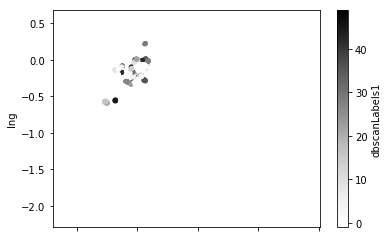

In [114]:
#now give it a plot
#define colorscheme

londonEventsdfNoNan.plot.scatter(y='lng', x='lat', c='dbscanLabels1', )

In [59]:
#try clustering out on the whole dataset
dbscan2ndRun = dbscan.fit(locsAsArray)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
londonEventsdf